# Heart Disease

#### In this dataset the risk factors that cause heart diseases are considered and predicted and various analysis are carried out.The aim is to find out presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

#### Attributes

1)age

2)sex

3)cp=chest pain type (4 values)

4)trestbps=resting blood pressure

5)chol=serum cholestoral in mg/dl

6)fbs=fasting blood sugar > 120 mg/dl

7)restecg=resting electrocardiographic results (values 0,1,2)

8)thalach=maximum heart rate achieved

9)exang=exercise induced angina

10)oldpeak = ST depression induced by exercise relative to rest

11)slope=the slope of the peak exercise ST segment

12)ca=number of major vessels (0-3) colored by flourosopy

13)thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14)The "target" field refers to the presence of heart disease in the patient

In [1]:
import pandas as pd
df=pd.read_csv("Heart_Disease.csv",na_values = "?")
df.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0


In [2]:
df.shape

(199, 14)

#### Rename the attributes for our convenience

In [3]:
df.rename(columns={"63":"age","1":"sex","4":"cp","140":"trestbps","260":"chol","0":"fbs","1.1":"restecg","112":"thalach",
                  "1.2":'exang',"3":'oldpeak',"2":"slope","?":'ca',"?.1":"thal","2.1":"target"},inplace=True)

In [4]:
df.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
75,49,1,1,130.0,0.0,0.0,1,145.0,0.0,3.0,2.0,NaN,NaN,2


In [5]:
#finding the unique values in each column
df.nunique()

age         39
sex          2
cp           4
trestbps    40
chol        99
fbs          2
restecg      3
thalach     59
exang        2
oldpeak     14
slope        3
ca           1
thal         3
target       5
dtype: int64

In [6]:
#checking the null values in dataset
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          197
thal        165
target        0
dtype: int64

#### Handling the null values

In [7]:
df["fbs"].mode()

0    0.0
dtype: float64

In [8]:
#filling the null values with mode and median
df["fbs"]=df["fbs"].fillna(0)
df["trestbps"]=df["trestbps"].fillna(df["trestbps"].mean())
df["ca"]=df["ca"].fillna(0)
df["exang"]=df["exang"].fillna(1)
df["slope"]=df["slope"].fillna(2)
df["thalach"]=df["thalach"].fillna(df["thalach"].mean())
df["chol"]=df["chol"].fillna(df["chol"].mean())
df["oldpeak"]=df["oldpeak"].fillna(df["oldpeak"].mean())
df["thal"]=df["thal"].fillna(7)

In [9]:
#check if the null values have been filled
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

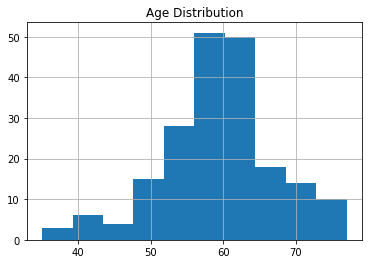

In [11]:
df['age'].hist().plot(kind='bar')
plt.title('Age Distribution')
plt.show()

Most of the people who suffered from heart disease were 57 to 62 years old

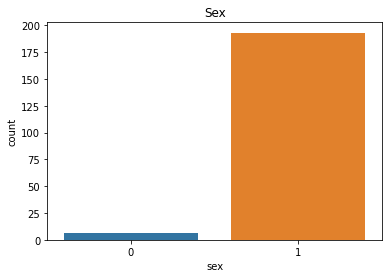

In [12]:
sns.countplot(df["sex"])
plt.title('Sex')
plt.show()

sex : (1 = male, 0 = female)
    
Thus among all the poeple the population of male patients is more 

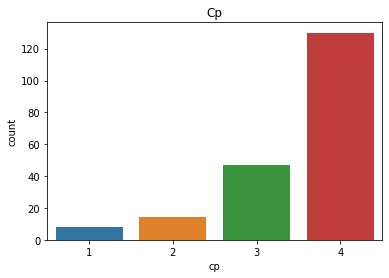

In [13]:
#chest pain
sns.countplot(df["cp"])
plt.title('Cp')
plt.show()

cp: chest pain type

-- Value 1: typical angina
    
-- Value 2: atypical angina

-- Value 3: non-anginal pain

-- Value 4: asymptomatic
    
Thus most of the people are asymptomatic

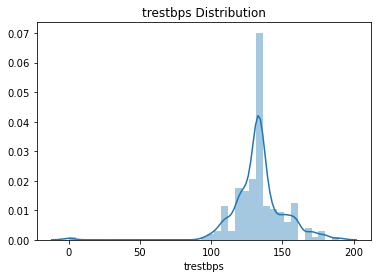

In [14]:
sns.distplot(df['trestbps'])
plt.title('trestbps Distribution')
plt.show()

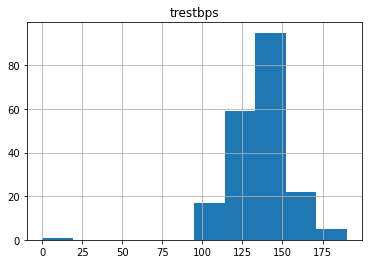

In [15]:
df['trestbps'].hist().plot(kind='bar')
plt.title('trestbps')
plt.show()

most of the values lie between 120 to 150

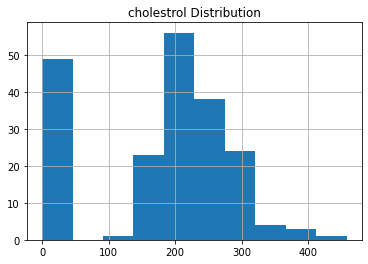

In [16]:
df['chol'].hist().plot(kind='bar')
plt.title('cholestrol Distribution')
plt.show()

most of the patients had 0 cholestrol while few had maximum cholestrols as 178 to 220 

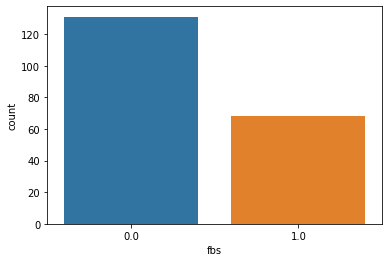

In [17]:
sns.countplot(df["fbs"])
plt.show()

 is the fps (Fasting Blood Sugar > 120 mg/dl): 
    
[0 = no, 1 = yes]

For most of the people the fbp is below 120mg/dl

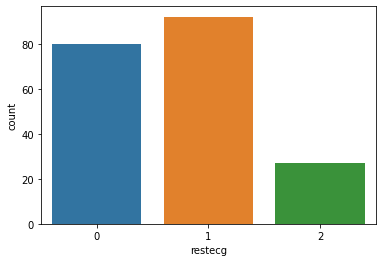

In [18]:
sns.countplot(df["restecg"])
plt.show()

restecg: resting electrocardiographic results
    
-- Value 0: normal
    
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

most of the people have abnormal st-t wave in ecg reports

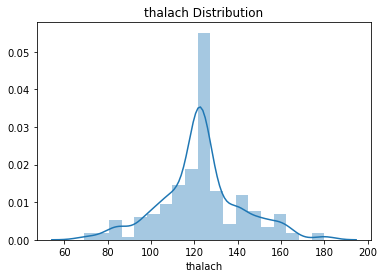

In [19]:
sns.distplot(df['thalach'])
plt.title('thalach Distribution')
plt.show()

thalach:heart rate achieved
    
we can see a normal curve with certain peak values at 122 

minimum value of heart rate=69

The maximum value of heart rate =180

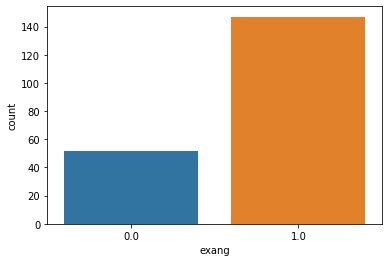

In [20]:
sns.countplot(df["exang"])
plt.show()

exang: exercise induced angina (1 = yes; 0 = no)
        
147 people had chest pain due to exercise

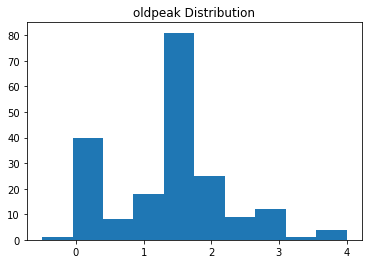

In [21]:
plt.hist(df["oldpeak"])
plt.title('oldpeak Distribution')
plt.show()

 oldpeak = ST depression induced by exercise relative to rest
    
most of the people had oldpeak as 1.303031   


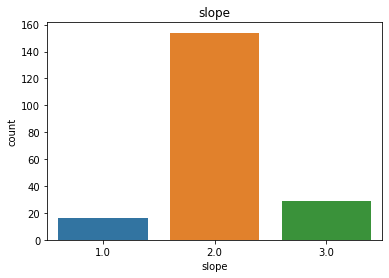

In [22]:
sns.countplot(df["slope"])
plt.title("slope")
plt.show()

slope: the slope of the peak exercise ST segment

-- Value 1: upsloping

-- Value 2: flat

-- Value 3: downsloping

150 people had a flat slope

29 people had downslope and 16 people had upslope


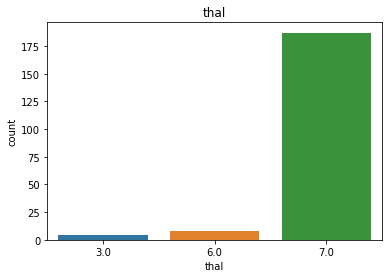

In [23]:
sns.countplot(df["thal"])
plt.title("thal")
plt.show()

thal:
    3 = normal;
    6 = fixed defect;
    7 = reversable defect
    
187 people had reversable defect while only 4 people were detected normal

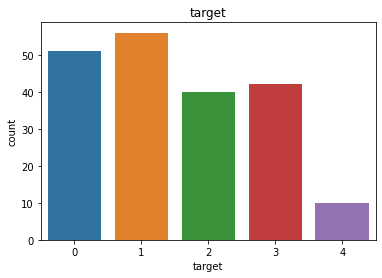

In [24]:
sns.countplot(df["target"])
plt.title("target")
plt.show()

0:represents no heart disease while 4 represents the presence
    
approximately 50 people had no heart disease

10 people were diagnosed with heart disease

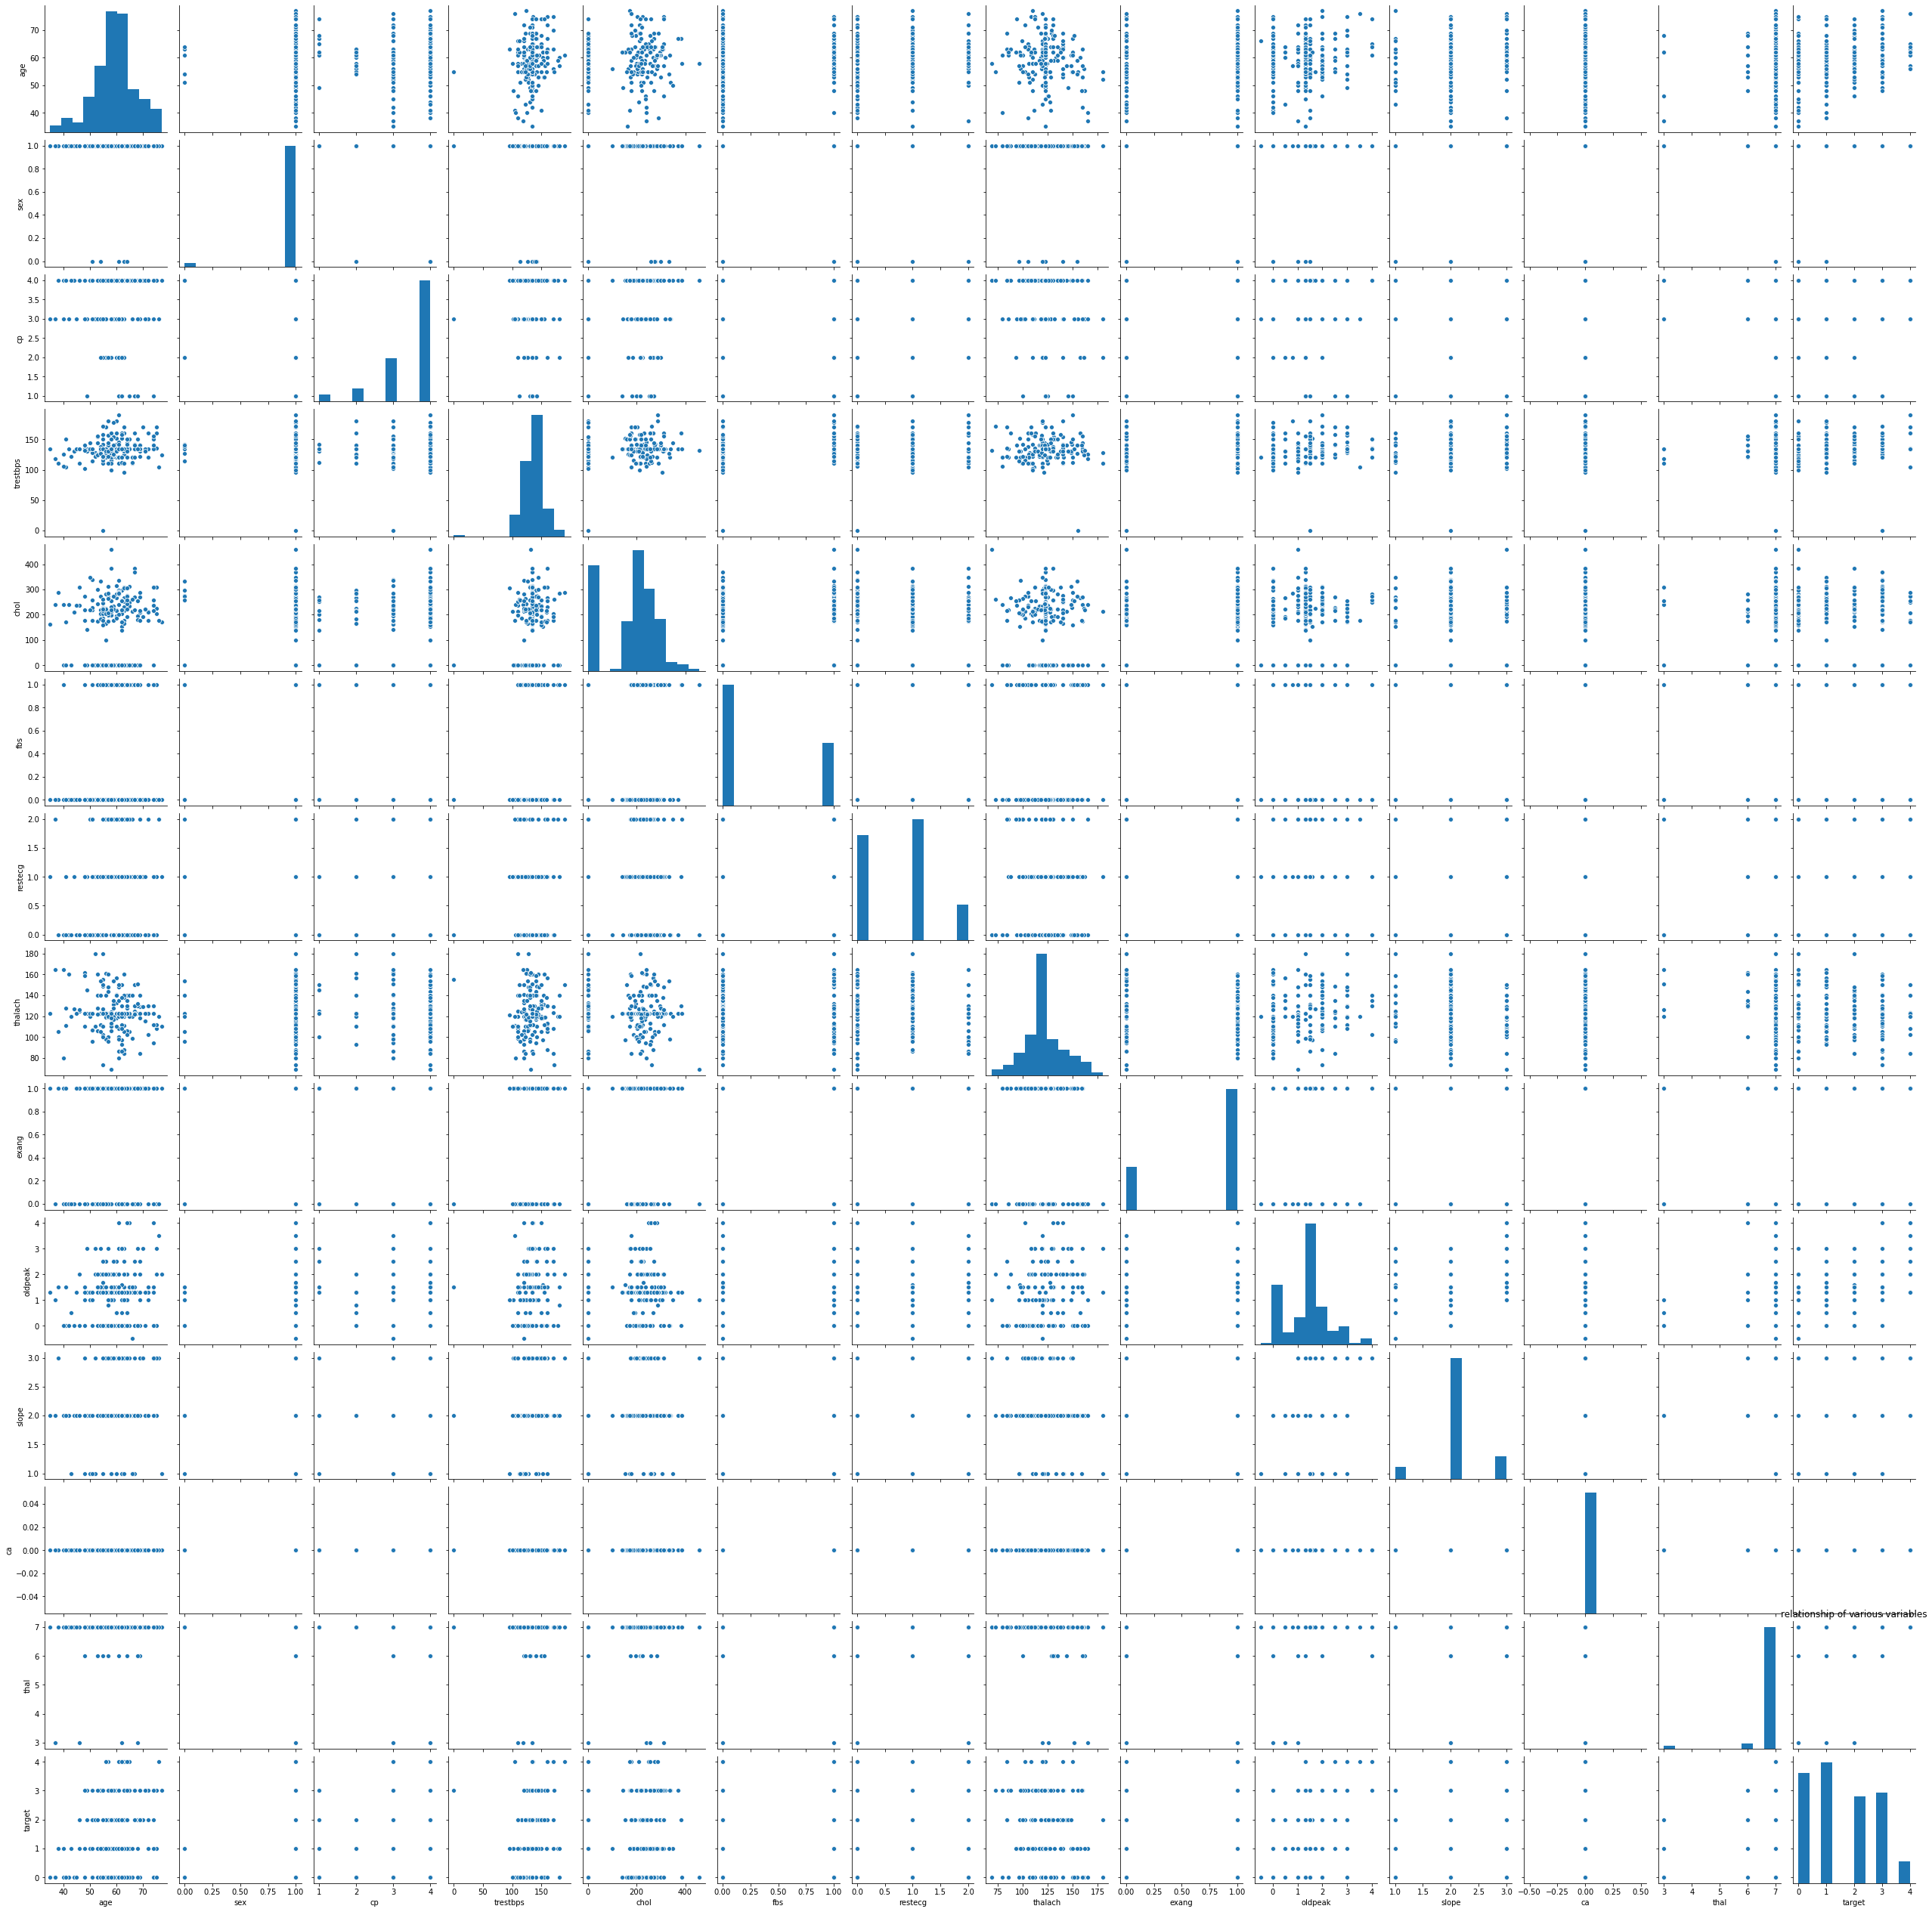

In [25]:
sns.pairplot(df)
plt.title("relationship of various variables")
plt.show()

# statistical analysis

In [26]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.033837,-0.039809,0.180915,0.065347,0.137672,0.001487,-0.148786,0.127815,0.154215,0.107525,NaN,0.105902,0.286630
sex,0.033837,1.000000,0.037525,0.012238,-0.096953,-0.058846,0.060305,-0.001016,0.028906,0.096219,0.086842,NaN,-0.036085,0.147190
cp,-0.039809,0.037525,1.000000,0.073888,0.063650,-0.042263,0.033617,-0.122405,0.088211,0.036454,0.059955,NaN,-0.010080,0.167202
trestbps,0.180915,0.012238,0.073888,1.000000,0.149121,0.193807,0.091401,-0.012047,0.204749,0.113345,0.083793,NaN,0.068345,0.141186
chol,0.065347,-0.096953,0.063650,0.149121,1.000000,0.176457,0.022824,-0.039052,0.115146,-0.005121,0.043947,NaN,-0.038363,0.075094
fbs,0.137672,-0.058846,-0.042263,0.193807,0.176457,1.000000,0.172306,0.036096,-0.174385,-0.100347,-0.009947,NaN,-0.032345,0.050448
restecg,0.001487,0.060305,0.033617,0.091401,0.022824,0.172306,1.000000,0.013548,-0.064442,-0.111718,-0.039628,NaN,0.020071,-0.033597
thalach,-0.148786,-0.001016,-0.122405,-0.012047,-0.039052,0.036096,0.013548,1.000000,-0.067926,0.178435,-0.107880,NaN,-0.177219,-0.078186
exang,0.127815,0.028906,0.088211,0.204749,0.115146,-0.174385,-0.064442,-0.067926,1.000000,0.284734,0.106771,NaN,0.150008,0.205628
oldpeak,0.154215,0.096219,0.036454,0.113345,-0.005121,-0.100347,-0.111718,0.178435,0.284734,1.000000,0.296867,NaN,0.156858,0.378550


we can see that ca has no relation with the target so we can drop it

In [27]:
df.drop(['ca'],axis=1,inplace=True)
df.sample()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
121,54,1,4,130.0,202.0,1.0,0,112.0,1.0,2.0,2.0,7.0,1


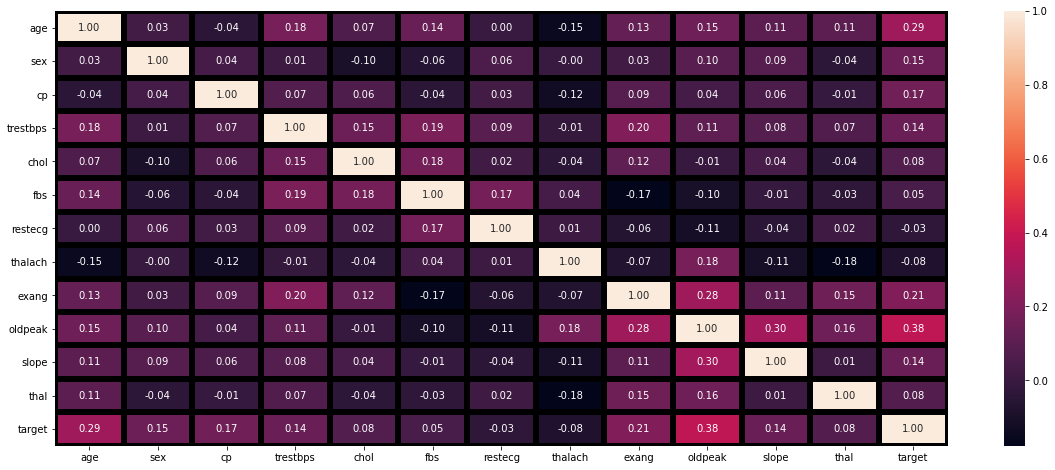

In [28]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt="0.2f",linecolor='black',linewidth=5)
plt.show()

#### obeservations:

columns with poor correlation:
    
restecg, thalach, chol, fbs, thal

age and oldpeak has the highest correlation with the target variable

cp and slope shows good positive correlation with target

In [29]:
df.skew()

age        -0.397178
sex        -5.537073
cp         -1.641267
trestbps   -1.501953
chol       -0.563256
fbs         0.672579
restecg     0.396540
thalach     0.137597
exang      -1.094854
oldpeak     0.441233
slope       0.207950
thal       -5.904837
target      0.302681
dtype: float64

we can see thal and sex has very high skewness and also very low correlation so we should prefer dropping them

In [30]:
df.drop(["restecg","thalach","sex","age"],axis=1,inplace=True)
df.sample()

,cp,trestbps,chol,fbs,exang,oldpeak,slope,thal,target
119,3,133.72028,0.0,1.0,1.0,1.309091,2.0,7.0,2


In [31]:
df.describe()

,cp,trestbps,chol,fbs,exang,oldpeak,slope,thal,target
count,199.000000,199.00000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,3.502513,133.72028,178.322917,0.341709,0.738693,1.309091,2.065327,6.879397,1.517588
std,0.796928,18.29815,112.144792,0.475479,0.440455,0.932462,0.472211,0.590777,1.222038
min,1.000000,0.00000,0.000000,0.000000,0.000000,-0.500000,1.000000,3.000000,0.000000
25%,3.000000,125.50000,119.500000,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000
50%,4.000000,133.72028,214.000000,0.000000,1.000000,1.309091,2.000000,7.000000,1.000000
75%,4.000000,140.00000,254.000000,1.000000,1.000000,2.000000,2.000000,7.000000,3.000000
max,4.000000,190.00000,458.000000,1.000000,1.000000,4.000000,3.000000,7.000000,4.000000


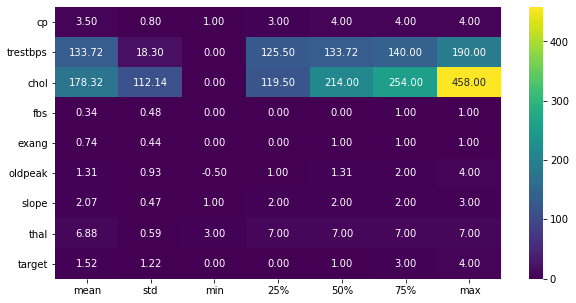

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df.describe()[1:].transpose(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

The standard deviation for "trestbps"and "chol" are very high

for rest of the columns the difference between the 50th percentile and mean is almost same

# outlier detection

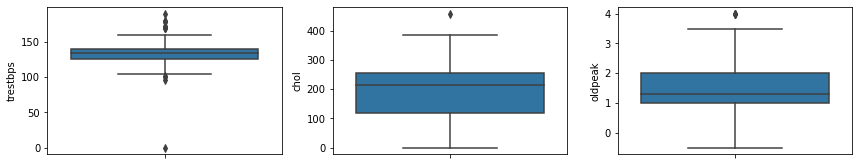

In [33]:
#boxplot
cols=["trestbps","chol","oldpeak"]
ncol=4
nrow=16
plt.figure(figsize=(4*ncol,9*ncol))
for i in range(0,len(cols)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[cols[i]],orient='v')
    plt.tight_layout()

certain outliers are present in the age and trestbps columns chol and oldpeak have less outliers

In [34]:
#zscore method
from scipy.stats import zscore
print(zscore(df))
z=zscore(df)

[[ 6.25830650e-01 -2.03827306e-01  2.74238799e-01 ... -1.38690832e-01
   2.04657804e-01 -1.24498245e+00]
 [ 6.25830650e-01 -9.42509722e-02  3.54694596e-01 ...  1.98434575e+00
   2.04657804e-01  3.95756011e-01]
 [ 6.25830650e-01  4.53630696e-01  4.44089926e-01 ... -2.26172741e+00
   2.04657804e-01 -4.24613220e-01]
 ...
 [ 6.25830650e-01 -6.42132640e-01  3.99392261e-01 ... -1.38690832e-01
  -1.49229649e+00  3.95756011e-01]
 [ 6.25830650e-01  1.55717336e-15  1.84759661e+00 ... -1.38690832e-01
   2.04657804e-01 -1.24498245e+00]
 [-1.89013499e+00 -7.51708974e-01  6.76517784e-01 ... -1.38690832e-01
   2.04657804e-01 -4.24613220e-01]]


In [35]:
import numpy as np
threshold=3
print(np.where(z>3))

(array([175], dtype=int64), array([1], dtype=int64))


In [36]:
df_new=df[(z<3).all(axis=1)]
print("original shape=",df.shape)
print("new shape=",df_new.shape)

original shape= (199, 9)
new shape= (198, 9)


In [37]:
#percentage loss of data
print("percentage loss=",((199-198)/199)*100)

percentage loss= 0.5025125628140703


As the percentage loss of data due to outliers is very less we can consider using the new dataset

#### assigning target and features to variables

In [88]:
#features
x=df_new.iloc[:,:-1]   #x=df_new.drop["target"]
x.sample()

,cp,trestbps,chol,fbs,exang,oldpeak,slope,thal
128,4,133.72028,272.0,0.0,1.0,1.309091,2.0,7.0


In [89]:
#label
y=df_new.iloc[:,8]  # y=df_new("target")
y.head()

0    0
1    2
2    1
3    0
4    0
Name: target, dtype: int64

# power transformations

there are certain features which have high skewness--> 1) cp 2) trestbps 3)exang 4)thal fow which we shall use transformations

In [90]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7
0,0.718376,-0.261615,0.406177,-0.715158,-1.675617,-1.527870,-0.117261,0.254000
1,0.718376,-0.141846,0.460349,-0.715158,0.596795,0.291447,1.974920,0.254000
2,0.718376,0.476906,0.519463,-0.715158,0.596795,1.237005,-2.327469,0.254000
3,-1.127410,-1.384714,0.430371,1.398293,0.596795,0.083863,-0.117261,0.254000
4,-1.127410,-0.840262,-1.683276,-0.715158,-1.675617,-2.358457,-2.327469,0.254000
...,...,...,...,...,...,...,...,...
193,0.718376,-0.438756,1.085724,1.398293,-1.675617,-1.527870,-0.117261,0.254000
194,-1.898019,-0.037760,-0.054265,-0.715158,0.596795,0.093463,-0.117261,0.254000
195,0.718376,-0.727245,0.490044,1.398293,-1.675617,-1.527870,-0.117261,-3.935523
196,0.718376,-0.037760,1.338093,1.398293,0.596795,0.093463,-0.117261,0.254000


#### Finding best random state

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

best_rstate=0
accu=0

for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    dc=RandomForestClassifier()
    dc.fit(x_train,y_train)
    y_pred=dc.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
   
    
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
       
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))   
#print("cross validation score=",cross_val_score(y_test,y_pred)*100)

Best accuracy is  60.0 found on random state 293


#### using the best random state found for data split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=293)

#### Finding the best model using loop

In [97]:
#using for loop to evaluate all classification algorithms

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

models=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB(),RandomForestClassifier()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("for",i,"algorithm")
    print(f"accuracy score is {accuracy_score(y_test,pred_y)*100}")
    crossval=cross_val_score(i,x,y,cv=5).mean()*100
    print("cross_validation score=",crossval)
    print('\n')
    


for DecisionTreeClassifier() algorithm
accuracy score is 40.0
cross_validation score= 31.294871794871792


for KNeighborsClassifier() algorithm
accuracy score is 43.333333333333336
cross_validation score= 32.80769230769231


for SVC() algorithm
accuracy score is 40.0
cross_validation score= 34.307692307692314


for GaussianNB() algorithm
accuracy score is 10.0
cross_validation score= 10.051282051282051


for RandomForestClassifier() algorithm
accuracy score is 60.0
cross_validation score= 38.88461538461539




As the good accuracy and cross validation can be seen for random forest and knn we shall study their performance using hypertuning

# Hypertuning RandomForest classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()

parameters={"n_estimators":[50,60,70,80,90],"criterion":['gini','entropy'],"max_features":["auto","sqrt","log2"]}
abc=GridSearchCV(rfc,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)
                                

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 50}


#### using the best parameters to build Random Forest model

In [100]:
#using the best parameter obtained above
rfc=RandomForestClassifier(criterion='entropy',max_features="log2",n_estimators=50)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
score=accuracy_score(y_test,y_pred)*100
print("accuracy",score)
crossval=cross_val_score(rfc,x,y,cv=5).mean()*100
print("cross_validation score=",crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 56.666666666666664
cross_validation score= 39.3974358974359


confusion matrix 
 [[6 0 2 0 0]
 [2 7 2 1 0]
 [1 3 1 0 0]
 [0 1 0 3 1]
 [0 0 0 0 0]]


classification report
               precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.64      0.58      0.61        12
           2       0.20      0.20      0.20         5
           3       0.75      0.60      0.67         5
           4       0.00      0.00      0.00         0

    accuracy                           0.57        30
   macro avg       0.45      0.43      0.44        30
weighted avg       0.59      0.57      0.58        30



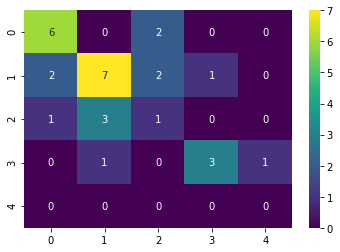

In [104]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="viridis")
plt.title("confusion matrix for random forest classifier")
plt.show()

# Hypertuning for KNN

In [105]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

parameters={"n_neighbors":[2,3,4,5,6,7,8],"weights":['uniform','distance'],"algorithm":["auto","ball_tree","brute"],
           "leaf_size":[81,20,54,62,30,40]}
abc=GridSearchCV(knn,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)
                                

{'algorithm': 'auto', 'leaf_size': 81, 'n_neighbors': 4, 'weights': 'distance'}


#### using the best parameters for knn

In [106]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=81,n_neighbors=4,weights='distance')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
score=accuracy_score(y_test,y_pred)*100
print("accuracy",score)
crossval=cross_val_score(knn,x,y,cv=5).mean()*100
print("cross_validation score=",crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 50.0
cross_validation score= 33.83333333333333


confusion matrix 
 [[5 0 3 0 0]
 [1 6 3 1 1]
 [0 4 1 0 0]
 [0 1 0 3 1]
 [0 0 0 0 0]]


classification report
               precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.55      0.50      0.52        12
           2       0.14      0.20      0.17         5
           3       0.75      0.60      0.67         5
           4       0.00      0.00      0.00         0

    accuracy                           0.50        30
   macro avg       0.45      0.38      0.41        30
weighted avg       0.59      0.50      0.54        30



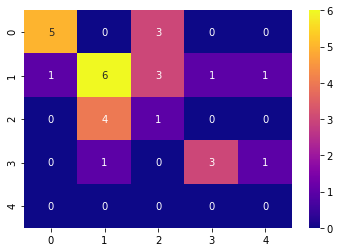

In [112]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="plasma")
plt.show()

# Saving the best model

In [113]:
import pickle
filename="Heart-disease.pkl"
pickle.dump(knn,open(filename,'wb'))

In [114]:
actual=np.array(y_test)

In [115]:
predicted=np.array(y_pred)

In [116]:
df_com=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_com

,actual values,predicted values
0,1,1
1,1,1
2,1,1
3,1,3
4,0,0
5,3,3
6,1,4
7,1,1
8,2,2
9,1,2


# Conclusion

Thus we have hypertuned randomforest classifier and knnclassifier and used the best model i.e KNN

The target variable predictions are approximately similary to the actual values with accuracy=50% and cross validation score of nearly 34%